**Bước 1: Khai báo thư viện**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle # thư viện giúp lưu trữ mô hình

**Bước 2: Đọc dữ liệu**

In [6]:
df = pd.read_csv("Dudoanluong.csv")

In [4]:
# Hiển thị số dòng(số lượng mẫu), số cột(số thuộc tính) của dữ liệu
print("Số dòng: ", df.shape[0])
print("Số cột: ", df.shape[1])

Số dòng:  1426
Số cột:  3


In [5]:
# Hiển thị 5 dòng dữ liệu đầu tiên
df.head() 

,SoNamKinhNghiem,NganhNghe,Luong
0,7,KeToan,26.0
1,4,KeToan,13.8
2,8,KeToan,21.5
3,9,KeToan,24.0
4,1,KeToan,7.8


In [6]:
# Hiển thị 20 dòng dữ liệu đầu tiên
df.head(20)

,SoNamKinhNghiem,NganhNghe,Luong
0,7,KeToan,26.0
1,4,KeToan,13.8
2,8,KeToan,21.5
3,9,KeToan,24.0
4,1,KeToan,7.8
5,2,KeToan,10.0
6,4,KeToan,13.5
7,5,KeToan,15.8
8,3,KeToan,12.2
9,2,KeToan,10.0


In [7]:
# Hiển thị 5 dòng dữ liệu cuối cùng
df.tail()

,SoNamKinhNghiem,NganhNghe,Luong
1421,8,Sale,22.8
1422,6,Sale,18.7
1423,0,Sale,7.3
1424,0,Sale,7.2
1425,10,Sale,27.0


In [8]:
# Hiển thị 10 dòng dữ liệu cuối cùng
df.tail(10)

,SoNamKinhNghiem,NganhNghe,Luong
1416,4,Sale,14.9
1417,1,Sale,9.5
1418,8,Sale,22.9
1419,1,Sale,9.4
1420,9,Sale,25.0
1421,8,Sale,22.8
1422,6,Sale,18.7
1423,0,Sale,7.3
1424,0,Sale,7.2
1425,10,Sale,27.0


In [9]:
#Hiển thị các thông tin thống kê(định lượng) của dữ liệu
df.describe()

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


In [10]:
# đổi tên các thuộc tính
nam = df['SoNamKinhNghiem']
luong = df['Luong']
nghe = df['NganhNghe']

**Bước 3: Vẽ đồ thị**

**Biểu đồ cột/thanh dọc - Bar chart**

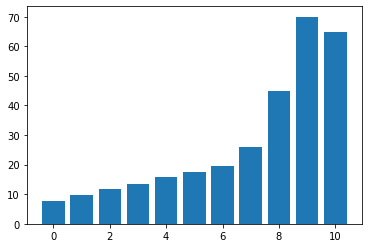

In [11]:
# Mối quan hệ giữa số năm kinh nghiệm và lương
plt.bar(nam, luong)
plt.show()

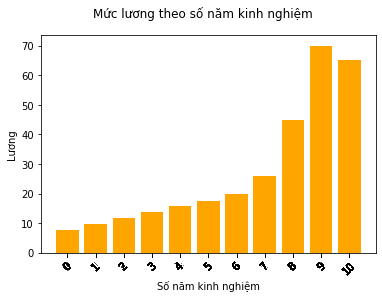

In [12]:
# Thêm nhãn cho biểu đồ
plt.xlabel('Số năm kinh nghiệm')
plt.ylabel('Lương')
plt.suptitle('Mức lương theo số năm kinh nghiệm')

# Hiển thị nhãn của các năm
plt.xticks(rotation=45)
plt.xticks(nam)

plt.bar(nam, luong, color = 'orange')
plt.show()

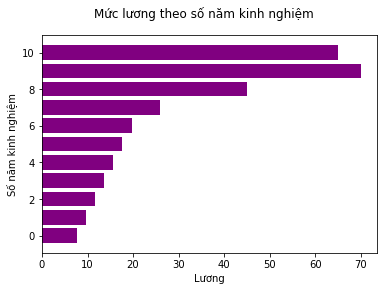

In [13]:
# Biểu đồ ngang
plt.ylabel('Số năm kinh nghiệm')
plt.xlabel('Lương')
plt.suptitle('Mức lương theo số năm kinh nghiệm')
plt.barh(nam, luong, color = 'purple')
plt.show()

In [14]:
# Vẽ nhiều đồ thị trong cùng một ảnh
# Ví dụ vẽ ba đồ thị về mối quan hẹ giữa lương và số năm king nghiệm của từng ngành nghề
# Bước 1: Tách bảng dữ liệu ban đầu thành các bảng con theo các tiêu chí
# Ví dụ tách bảng dữ liệu thành ba bảng con theo 3 ngành nghề
df_ketoan = df[nghe == 'KeToan']
df_hcns = df[nghe == 'HCNS']
df_sale = df[nghe == 'Sale']

print ("Số lượng mẫu nhân viên Kế toán: ", (df_ketoan.shape[0]))
print ("Số lượng mẫu nhân viên HCNS: ", (df_hcns.shape[0]))
print ("Số lượng mẫu nhân viên SALE: ", (df_sale.shape[0]))

print("Dữ liệu bảng kế toán")
print(df_ketoan)

Số lượng mẫu nhân viên Kế toán:  472
Số lượng mẫu nhân viên HCNS:  566
Số lượng mẫu nhân viên SALE:  388
Dữ liệu bảng kế toán
     SoNamKinhNghiem NganhNghe  Luong
0                  7    KeToan   26.0
1                  4    KeToan   13.8
2                  8    KeToan   21.5
3                  9    KeToan   24.0
4                  1    KeToan    7.8
..               ...       ...    ...
467                2    KeToan   10.1
468                2    KeToan    9.7
469               10    KeToan   26.1
470                7    KeToan   20.4
471                5    KeToan   16.2

[472 rows x 3 columns]


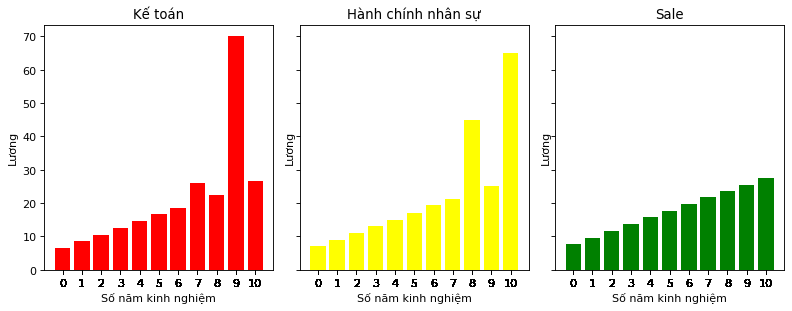

In [15]:
# Bước 2: Vẽ 3 đồ thị Trong Matplotlib, mỗi plt.plot() trả về một đối tượng Figure (là hình ảnh bên ngoài), trong Figure lại có thể có nhiều các đối tượng Axes là các đồ thị con bên trong
# Tạo đồ thị gồm 1 hàng 3 cột
nam_kt = df_ketoan['SoNamKinhNghiem']
nam_hcns = df_hcns['SoNamKinhNghiem']
nam_sale = df_sale['SoNamKinhNghiem']
luong_kt = df_ketoan['Luong']
luong_hcns = df_hcns['Luong']
luong_sale = df_sale['Luong']

fig, (ax1, ax2, ax3)= plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=80)
ax1.bar(nam_kt, luong_kt, color = 'red')
ax2.bar(nam_hcns, luong_hcns, color = 'yellow') 
ax3.bar(nam_sale, luong_sale, color = 'green')

# Tiêu đề và nhãn của các đồ thị con
ax1.set_title('Kế toán')
ax2.set_title('Hành chính nhân sự')
ax3.set_title('Sale')
ax1.set_xlabel('Số năm kinh nghiệm')
ax2.set_xlabel('Số năm kinh nghiệm')
ax3.set_xlabel('Số năm kinh nghiệm')
ax1.set_ylabel('Lương')
ax2.set_ylabel('Lương')
ax3.set_ylabel('Lương')

ax1.set_xticks(nam)
ax2.set_xticks(nam)
ax3.set_xticks(nam)

plt.tight_layout()
plt.show()


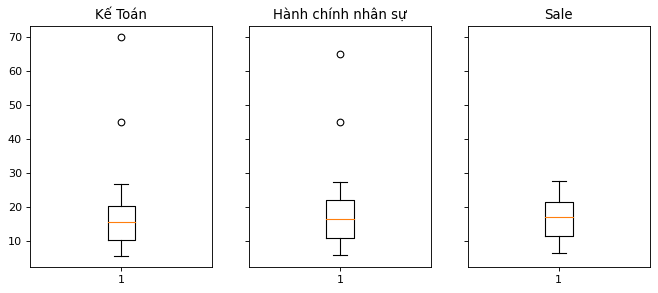

In [16]:
# Biểu đồ hộp phân bố lương của nhân viên Kế toán
fig, (ax1, ax2, ax3)= plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=80)

ax1.boxplot(luong_kt)
ax2.boxplot(luong_hcns)
ax3.boxplot(luong_sale)

ax1.set_title('')
ax2.set_title('')
ax3.set_title('')

plt.show()

**Bước 4 : Xây dựng mô hình**

In [17]:
# Xác định thuộc tính mô tả x và thuộc tính dự đoán y

features = ['SoNamKinhNghiem']
target = ['Luong']
X = df[features]
y = df[target]

#X = df['SoNamKinhNghiem']
#y = df['Luong']

print(X)
print(y)

      SoNamKinhNghiem
0                   7
1                   4
2                   8
3                   9
4                   1
...               ...
1421                8
1422                6
1423                0
1424                0
1425               10

[1426 rows x 1 columns]
      Luong
0      26.0
1      13.8
2      21.5
3      24.0
4       7.8
...     ...
1421   22.8
1422   18.7
1423    7.3
1424    7.2
1425   27.0

[1426 rows x 1 columns]


In [18]:
# 2. Chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      SoNamKinhNghiem
354                 5
278                10
365                 6
266                 2
1285               10
...               ...
1220                0
587                 9
1202                1
394                 0
455                10

[1140 rows x 1 columns]
      Luong
354    16.1
278    26.2
365    18.4
266     9.6
1285   27.3
...     ...
1220    6.8
587    24.1
1202    9.1
394     5.8
455    25.6

[1140 rows x 1 columns]
      SoNamKinhNghiem
488                 0
433                 4
670                 2
779                 9
283                 2
...               ...
1304                7
1264                3
697                 2
936                 5
389                 2

[286 rows x 1 columns]
      Luong
488     6.1
433    14.1
670    10.4
779    24.4
283    10.0
...     ...
1304   20.8
1264   13.1
697    10.4
936    16.5
389     9.8

[286 rows x 1 columns]


In [19]:
# 3.Khai báo mô hình hồi quy tuyến tính
model = LinearRegression()

In [20]:
# 4.Huấn luyện mô hình

model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(" Mô hình hồi quy sẽ có dạng: Lương = a + b * SoNamKinhNghiem  ")
print("với các hệ số a và b lần lượt là")
print("a =", model.intercept_)
print("b =", model.coef_)

 Mô hình hồi quy sẽ có dạng: Lương = a + b * SoNamKinhNghiem  
với các hệ số a và b lần lượt là
a = [6.28493815]
b = [[2.04927055]]


In [22]:
# 5.Kiểm thử mô hình
y_pred = model.predict(X_test)
print(y_pred)

[[ 6.28493815]
 [14.48202034]
 [10.38347925]
 [24.72837308]
 [10.38347925]
 [14.48202034]
 [14.48202034]
 [22.67910253]
 [14.48202034]
 [18.58056144]
 [18.58056144]
 [16.53129089]
 [ 8.3342087 ]
 [20.62983199]
 [20.62983199]
 [26.77764363]
 [18.58056144]
 [ 6.28493815]
 [16.53129089]
 [24.72837308]
 [14.48202034]
 [16.53129089]
 [10.38347925]
 [24.72837308]
 [26.77764363]
 [22.67910253]
 [18.58056144]
 [20.62983199]
 [24.72837308]
 [14.48202034]
 [10.38347925]
 [ 8.3342087 ]
 [16.53129089]
 [ 8.3342087 ]
 [ 8.3342087 ]
 [16.53129089]
 [22.67910253]
 [18.58056144]
 [16.53129089]
 [ 6.28493815]
 [12.4327498 ]
 [26.77764363]
 [12.4327498 ]
 [ 8.3342087 ]
 [10.38347925]
 [18.58056144]
 [22.67910253]
 [24.72837308]
 [10.38347925]
 [26.77764363]
 [20.62983199]
 [ 6.28493815]
 [14.48202034]
 [14.48202034]
 [24.72837308]
 [26.77764363]
 [ 6.28493815]
 [12.4327498 ]
 [14.48202034]
 [24.72837308]
 [26.77764363]
 [14.48202034]
 [10.38347925]
 [ 8.3342087 ]
 [20.62983199]
 [14.48202034]
 [18.58056

In [23]:
#6.Độ chính xác của mô hình
f = model.score(X_test,y_test)
print("Độ chính xác của mô hình: ", f)

Độ chính xác của mô hình:  0.9511277086837395


In [24]:
# 7.Sử dụng mô hình dự đoán cho dữ liệu mới với Số năm kinh nghiệm 1.2 năm

x = [[1.2],]
y = model.predict(x)
print(y)

[[8.74406281]]


In [25]:
#8. Lưu trữ và sử dụng mô hình sau khi đã huấn luyện với ba số năm kinh nghiệm: 1 năm, 2 năm, 4 năm.

filename= 'model_luong.sav'
pickle.dump(model, open(filename, 'wb'))


In [26]:
# 9. Gọi mô hình lưu trữ và dự đoán mức lương cho số năm kinh nghiệm là 1,2,4 năm
loaded_model = pickle.load(open(filename, 'rb'))

x = [[1],[2],[4]]
y_pred = loaded_model.predict(x)
y_pred

array([[ 8.3342087 ],
       [10.38347925],
       [14.48202034]])